In [2]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import quad , dblquad , trapezoid , simpson , fixed_quad

# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Orly de Jesus Rivera Cruz
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

La tabla con el tiempo y la corriente es:

    Tiempo  Corriente
0    1.00       3.10
1    1.01       3.12
2    1.02       3.14
3    1.03       3.18
4    1.04       3.24 




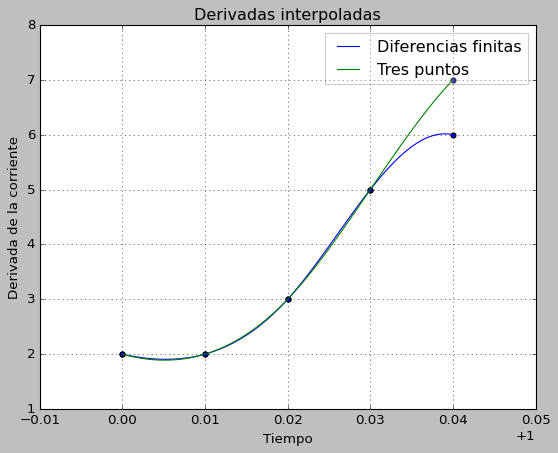

Aproximadamente los voltajes con sus tiempos respectivos son:

    Tiempo  Voltaje
0    1.00  2.40020
1    1.01  2.40304
2    1.02  3.38588
3    1.03  5.35156
4    1.04  7.32008 




In [105]:
#Problema 1

Tiempo = np.array([1.00, 1.01, 1.02, 1.03, 1.04])     # Tiempo
Corriente = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # Corriente
Tiempo_Continuo = np.linspace(1 , 1.04 , 100)         # Tiempo mas continuo 
L = 0.98
R = 0.142

#------------------------------------------------------------------------------------------

def diferencias_finitas( y , h ):                     #Metodo de diferencias finitas
    n = len(y)
    f_prime = np.zeros(n)
    for i in range(n):
        if i == 0: 
            f_prime[i] = (y[i+1] - y[i]) / (h)
        elif i == n-1:
            f_prime[i] = (y[i] - y[i-1]) / (h)
        else:
            f_prime[i] = (y[i+1] - y[i-1]) / (2*h)
    return f_prime


def diferenciacion_tres_puntos( y , h ):             #Metodo de la derivada con tres puntos
    n = len(y)
    f_prime = np.zeros(n)
    for i in range(n):
        if i == 0: 
            f_prime[i] = (   (y[i] * -3) + (y[i+1] * 4) + (y[i+2] * -1)   ) / (2*h)
        elif i == n-1:
            f_prime[i] = (   (y[i] * 3) + (y[i-1] * -4) + (y[i-2] * 1)   ) / (2*h)
        else:
            f_prime[i] = (y[i+1] - y[i-1]) / (2*h)
    return f_prime

#------------------------------------------------------------------------------------------

Tabla = pd.DataFrame({"Tiempo":Tiempo , "Corriente":Corriente})    #Dataframe con los datos preestablecidos

print("La tabla con el tiempo y la corriente es:\n\n",Tabla,"\n\n")

#------------------------------------------------------------------------------------------

plt.style.use("classic")

di1 = diferencias_finitas( Corriente , 0.01)                       #Las derivadas numericas con diferencias finitas
Cs1 = CubicSpline(Tiempo, di1)    

plt.title("Derivadas interpoladas")
plt.xlabel("Tiempo")
plt.ylabel("Derivada de la corriente")

plt.scatter(Tiempo , di1)                           
plt.plot(Tiempo_Continuo , Cs1(Tiempo_Continuo) , label="Diferencias finitas")

di2 = diferenciacion_tres_puntos( Corriente , 0.01)                #Las derivadas numericas con diferenciacion en tres puntos
Cs2 = CubicSpline(Tiempo, di2) 

plt.scatter(Tiempo , di2)                             
plt.plot(Tiempo_Continuo , Cs2(Tiempo_Continuo) , label="Tres puntos")

plt.legend(framealpha = 0.2)
plt.grid()
plt.show()

#------------------------------------------------------------------------------------------

Voltajes = L*di2 + R*Corriente
Tabla2 = pd.DataFrame({"Tiempo":Tiempo , "Voltaje":Voltajes})

print("Aproximadamente los voltajes con sus tiempos respectivos son:\n\n",Tabla2,"\n\n")

# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [106]:
#Problema 2

Tiempo = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
Distancia = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m

Velocidad = np.gradient( Distancia , Tiempo )

Tabla = pd.DataFrame({"Tiempo(s)":Tiempo , "Velocidad(m/s)":Velocidad})

print("Las velocidades en sus respectivos tiempos son:\n\n",Tabla,"\n\n")

Velocidad_Continua = CubicSpline(Tiempo , Velocidad)

print("La velocidad en 12 segundos con una interpolacion de CubicSplines es de:",Velocidad_Continua(12))

Las velocidades en sus respectivos tiempos son:

    Tiempo(s)  Velocidad(m/s)
0          0       75.000000
1          3       77.400000
2          5       79.400000
3          8       67.700000
4         10       69.166667
5         13       83.666667 


La velocidad en 12 segundos con una interpolacion de CubicSplines es de: 78.29663504111319


# 3.
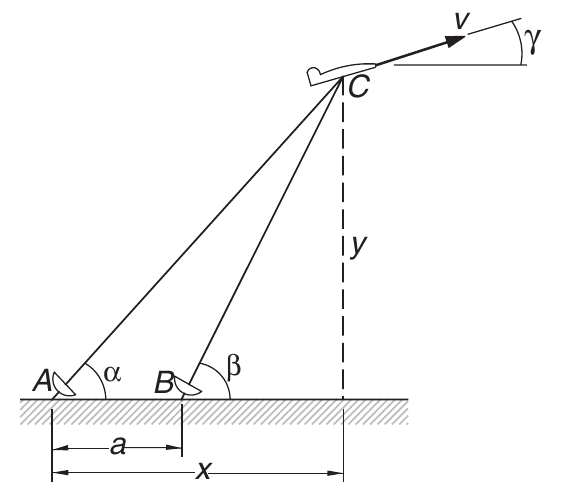


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

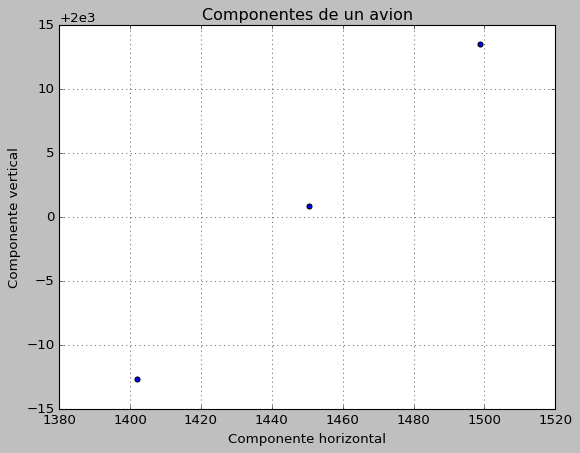

La velocidad de el avion a los 10 segundos es de : 50.09944162965281 
Ademas el angulo formado por el avión en ese mismo tiempo es de: 15.13448420321253


In [103]:
#Problema 3

t     = np.array((9    , 10   , 11   ))
alpha = np.array((54.80, 54.06, 53.34))
alpha = np.radians(alpha)
beta  = np.array((65.59, 64.59, 63.62))
beta = np.radians(beta)

a = 500

x = a * (   ( np.tan(beta)                ) / (np.tan(beta) - np.tan(alpha))   )
y = a * (   ( np.tan(beta) * np.tan(alpha)) / (np.tan(beta) - np.tan(alpha))   )

plt.scatter(x,y)

plt.title("Componentes de un avion")
plt.xlabel("Componente horizontal")
plt.ylabel("Componente vertical")

plt.grid()
plt.show()

vx = np.gradient(x,t)
vy = np.gradient(y,t)

v10 = (vx[1]**2 + vy[1]**2)**(1/2)

m = np.gradient(y,x)

print("La velocidad de el avion a los 10 segundos es de :", v10 ,"\nAdemas el angulo formado por el avión en ese mismo tiempo es de:",np.degrees(np.arctan(m[1])) )

# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [104]:
#Problema 4

Tiempo = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
Velocidad = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

Aceleracion = np.gradient( Velocidad , Tiempo )

Aceleracion_Continua = CubicSpline(Tiempo , Velocidad)

print("La aceleracion en 28 segundos con una interpolacion de CubicSplines es de:",Aceleracion_Continua(28) , "metros cada segundo cuadrado")

Velocidad_Continua = CubicSpline(Tiempo , Velocidad)
Distancia_recorrida , _ = quad(Velocidad_Continua , 0 , 28)

print("La distancia total recorrida por el objeto es de:",round(Distancia_recorrida,2)," metros")

La aceleracion en 28 segundos con una interpolacion de CubicSplines es de: 129.7 metros cada segundo cuadrado
La distancia total recorrida por el objeto es de: 2319.71  metros


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [ ]:
#Problema 5
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

A_s = -np.gradient(V, z)

V_t = simpson(A_s , z)

Concentracion_promedio = simpson(c * A_s, z) / V_t

print("La concentración promedio es de:", Concentracion_promedio, "g/m**3")

La concentración promedio es de: 8.097333333333333 g/m**3


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [30]:
#Problema 6
P = lambda r : (1/8) * (r**2) * ((2-r)**2) * (np.exp(-r))

Ra = np.arange(10,26)
Trapezoid = np.zeros(16)
Simpson = np.zeros(16)
Fixed_Quad = np.zeros(16)

for i,R in enumerate(range(10,26)):
    integral_real = quad(P , 0 , R)[0]
    for n in np.arange(10 , 10000 , 1):
        x = np.linspace(0 , R , n)
        y = P(x)
        
        integral_trapezoid = trapezoid( y , x )
        if abs( integral_trapezoid - integral_real ) < 1e-6:
            Trapezoid[i] = integral_trapezoid
            break
        else:
            pass

    for n in np.arange(10 , 10000 , 1):
        x = np.linspace(0 , R , n)
        y = P(x)
        
        integral_simpson = simpson( y , x )
        if abs( integral_simpson - integral_real ) < 1e-6:
            Simpson[i] = integral_simpson
            break
        else:
            pass

    for n in np.arange(1,100):

        integral_quad , _ = fixed_quad( P , 0 , R , n = n)

        if abs( integral_quad - integral_real ) < 1e-6:
            Fixed_Quad[i] = integral_quad
            break
        else:
            pass

Datos = {
    "R": Ra,
    "Trapezoid": Trapezoid,
    "Simpson": Simpson,
    "Fixed_quad": Fixed_Quad
}

Tabla = pd.DataFrame(Datos)
print("Nuestros valores para distintos metodos con error < 1e-6 es:\n\n",Tabla)

print("\n Para comprobar que el area bajo la curva es 1 usaremos el metodo quad desde 0 hasta el infinito de numpy lo cual da:\n" , quad(P , 0 , np.inf)[0])
print(" Lo que efectivamente se comprueba que da 1")

Nuestros valores para distintos metodos con error < 1e-6 es:

      R  Trapezoid   Simpson  Fixed_quad
0   10   0.940480  0.940482    0.940481
1   11   0.968222  0.968224    0.968223
2   12   0.983551  0.983553    0.983551
3   13   0.991707  0.991709    0.991708
4   14   0.995912  0.995914    0.995913
5   15   0.998024  0.998026    0.998024
6   16   0.999061  0.999063    0.999062
7   17   0.999560  0.999562    0.999561
8   18   0.999796  0.999798    0.999797
9   19   0.999907  0.999909    0.999907
10  20   0.999957  0.999959    0.999958
11  21   0.999980  0.999982    0.999981
12  22   0.999991  0.999993    0.999991
13  23   0.999995  0.999997    0.999996
14  24   0.999997  0.999999    0.999998
15  25   0.999998  1.000000    0.999999

 Para comprobar que el area bajo la curva es 1 usaremos el metodo quad desde 0 hasta el infinito de numpy lo cual da:
 1.0
 Lo que efectivamente se comprueba que da 1


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

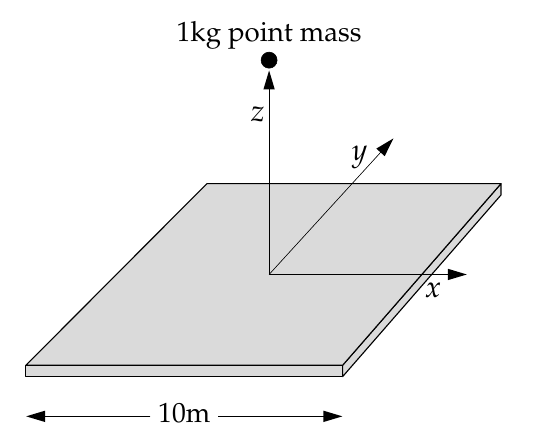

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


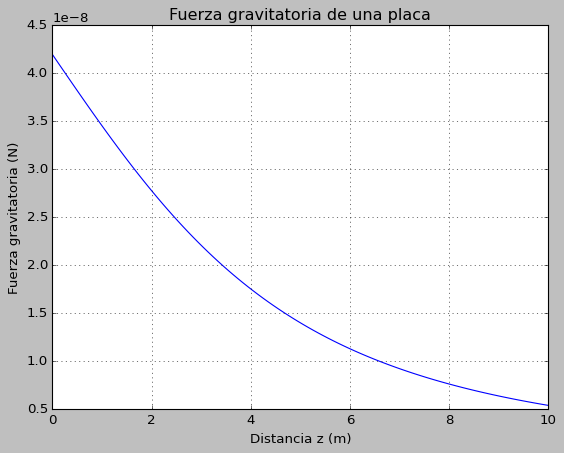

In [74]:
#Problema 7

G = 6.674e-11
L = 10
M = 10000
o = (M)/(L**2)

a = -L/2
b = L/2

z_conti = np.linspace(0.01,10,100)

def Fuerza_Gravitoria(z):
    F = np.zeros(len(z))
    n=0
    for i in z:
        f = lambda x,y : 1/((x**2 + y**2 + i**2)**(3/2))
        Integral , _ = dblquad(f , a , b , a , b )
        F[n] = Integral*G*o*i
        n+=1
    return F

plt.title("Fuerza gravitatoria de una placa")

plt.xlabel("Distancia z (m)")
plt.ylabel("Fuerza gravitatoria (N)")

plt.plot( z_conti , Fuerza_Gravitoria(z_conti) )
plt.grid()
plt.show()